In [1]:
# import sys
# from pathlib import Path
# root_dir = Path().resolve().parent  # goes one level up from `test/`
# sys.path.insert(0, str(root_dir))

In [2]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from plotsense.visual_suggestion.Visual_suggestion_v3 import recommender
from plotsense import refine_plot_explanation, recommender, explainer


In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
titanic = sns.load_dataset('titanic')
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [5]:
def quick_plot(plot_type, *args, color=None, title=None, xlabel=None, ylabel=None, **kwargs):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot()
 
    # Dynamically call the method from ax (e.g., ax.bar, ax.plot, ax.scatter)
    try:
        plot_func = getattr(ax, plot_type)
    except AttributeError:
        raise ValueError(f"Plot type '{plot_type}' is not supported by matplotlib Axes.")
 
    plot_func(*args, color=color, **kwargs)
 
    if title:
        ax.set_title(title)
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)
 
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
 
    return fig

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
recommendation = recommender(titanic, n=20)
recommendation

,plot_type,variables,rationale,ensemble_score,model_agreement,source_models
0,hist,age,"Shows the distribution of passenger ages, whic...",1.25,5,"[llama3-8b-8192, llama3-8b-8192, llama3-70b-81..."
1,hist,fare,"Shows the distribution of fares, which can hel...",1.00,4,"[llama3-8b-8192, llama3-70b-8192, mistral-saba..."
2,bar,"alone, survived",Compares the survival rates of passengers trav...,1.00,4,"[llama3-8b-8192, llama3-70b-8192, mistral-saba..."
3,scatter,"fare, survived",Investigates the relationship between the fare...,0.75,3,"[llama3-8b-8192, llama3-70b-8192, mistral-saba..."
4,bar,"pclass, survived",Compares the survival rates across different p...,0.75,3,"[llama3-8b-8192, llama3-70b-8192, mistral-saba..."
5,hexbin,"age, fare",Visualizes the relationship between age and fa...,0.75,3,"[llama3-8b-8192, llama3-70b-8192, llama-3.3-70..."
6,bar,"survived, who",Compares the survival rates of male and female...,0.75,3,"[llama3-8b-8192, mistral-saba-24b, llama-3.3-7..."
7,bar,"embarked, survived",Compares the survival rates across different e...,0.75,3,"[llama3-8b-8192, llama3-70b-8192, mistral-saba..."
8,scatter,"age, fare",Examines potential relationship between passen...,0.75,3,"[llama3-70b-8192, mistral-saba-24b, llama-3.3-..."
9,boxplot,"age, survived",Compares the distribution of ages between surv...,0.50,2,"[llama3-8b-8192, mistral-saba-24b]"


In [8]:
def quick_plot(plot_type, *args, color=None, title=None, xlabel=None, ylabel=None, **kwargs):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot()

    # Dynamically call the method from ax (e.g., ax.bar, ax.plot, ax.scatter)
    try:
        plot_func = getattr(ax, plot_type)
    except AttributeError:
        raise ValueError(f"Plot type '{plot_type}' is not supported by matplotlib Axes.")

    plot_func(*args, color=color, **kwargs)

    if title:
        ax.set_title(title)
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return fig


<Axes: xlabel='fare', ylabel='age'>

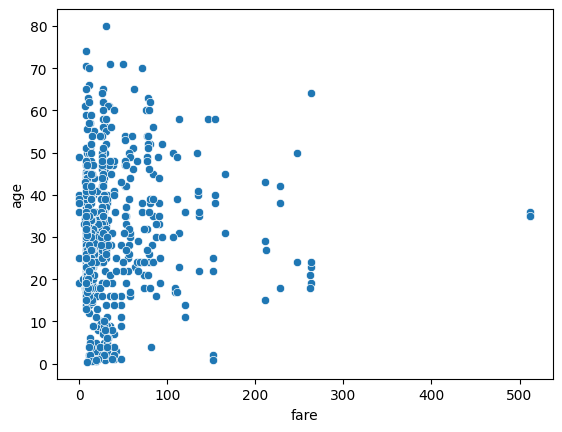

In [11]:
fig, ax = plt.subplots()
sns.scatterplot(data=titanic, x='fare', y='age', ax=ax)

In [12]:
explanation = explainer(fig)
print("Generated Explanation:")
print(explanation)

Generated Explanation:
### **Data Visualization Analysis: Scatter Plot of Age vs. Fare**

#### **Overview**

The provided scatter plot illustrates the relationship between two variables: `age` (on the y-axis) and `fare` (on the x-axis). Each data point represents an observation, plotted according to its age and corresponding fare. The scatter plot contains a large number of data points, indicating a substantial dataset.

#### **Key Observations**

* **Distribution of Data Points:** The data points are dispersed across the plot, suggesting variability in both age and fare. A dense cluster of points is observed at lower ages (approximately 20-40) and lower fares (0-100), indicating a common demographic or scenario. In contrast, the upper range of ages (60-80) appears to have fewer data points, which might suggest less data or less variability in this age group regarding fare.
* **Age Range:** The age of individuals ranges from approximately 0 to 80 years, as indicated by the y-axis. Ther